### <center>Machine Learning </center>
### <center>Exercise No. 8: Ensemble Learning</center>

**Aim:** To classify given data using Ensemble Learning

**Prerequisites:** Concepts of classification, Decision tree classifier, Variance,Ensemble Learning.

**Outcomes:** After completion of this experiment students will be able to:

    1. Classify real world data using Ensemble Learning
    2. Identify how variance is reduced in Ensemble learning and 
    3. Compare different Ensemble learning algorithms

### Random Forest, Bagging and Boosting

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
The low correlation between models is the key. While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are: 

There needs to be some actual signal in our features so that models built using those features do better than random guessing.
The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

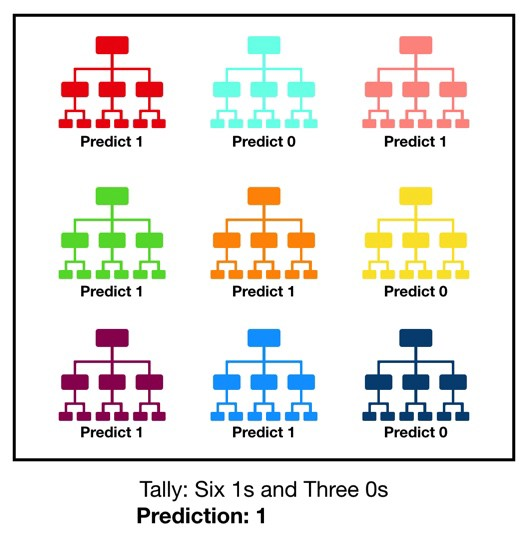

### Bagging
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.
Each base classifier is trained in parallel with a training set which is generated by randomly drawing, with replacement, N examples(or data) from the original training dataset – where N is the size of the original training set. Training set for each of the base classifiers is independent of each other. Many of the original data may be repeated in the resulting training set while others may be left out.

Bagging reduces overfitting (variance) by averaging or voting, however, this leads to an increase in bias, which is compensated by the reduction in variance though.

### How Bagging works on training dataset ?
How bagging works on an imaginary training dataset is shown below. Since Bagging resamples the original training dataset with replacement, some instance(or data) may be present multiple times while others are left out.

Original training dataset: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Resampled training set 1: 2, 3, 3, 5, 6, 1, 8, 10, 9, 1
Resampled training set 2: 1, 1, 5, 6, 3, 8, 9, 10, 2, 7
Resampled training set 3: 1, 5, 8, 9, 2, 10, 9, 7, 5, 4

Algorithm for the Bagging classifier:

Classifier generation:

Let N be the size of the training set.
for each of t iterations:
    sample N instances with replacement from the original training set.
    apply the learning algorithm to the sample.
    store the resulting classifier.

Classification:
for each of the t classifiers:
    predict class of instance using classifier.
return class that was predicted most often.

### Boosting
Unlike many ML models which focus on high quality prediction done by a single model, boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.
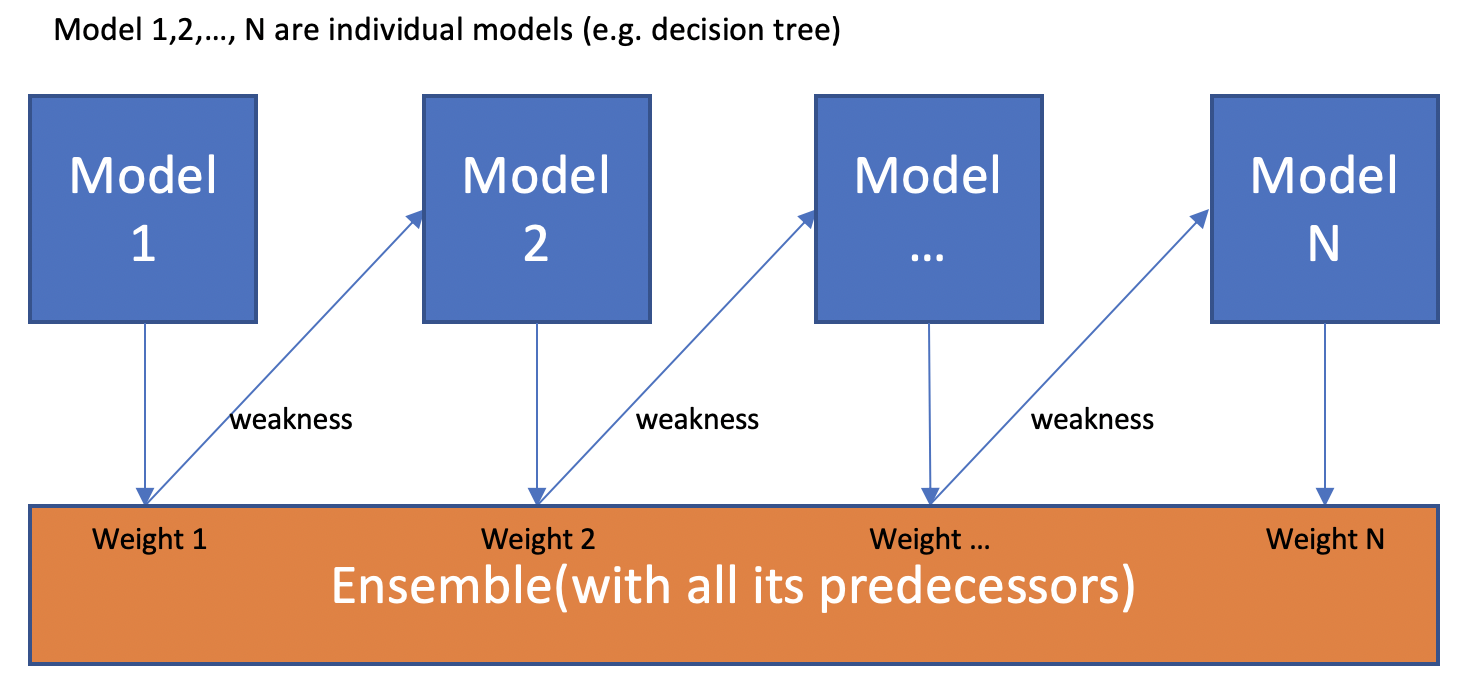

To understand Boosting, it is crucial to recognize that boosting is a generic algorithm rather than a specific model. Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it. Two major algorithms: Adaptive Boosting (AdaBoost) and Gradient Boosting.

AdaBoost is a specific Boosting algorithm developed for classification problems (also called discrete AdaBoost). The weakness is identified by the weak estimator’s error rate. In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right.The following figure illustrates how weights impact the performance of a simple decision stump(tree with depth 1)
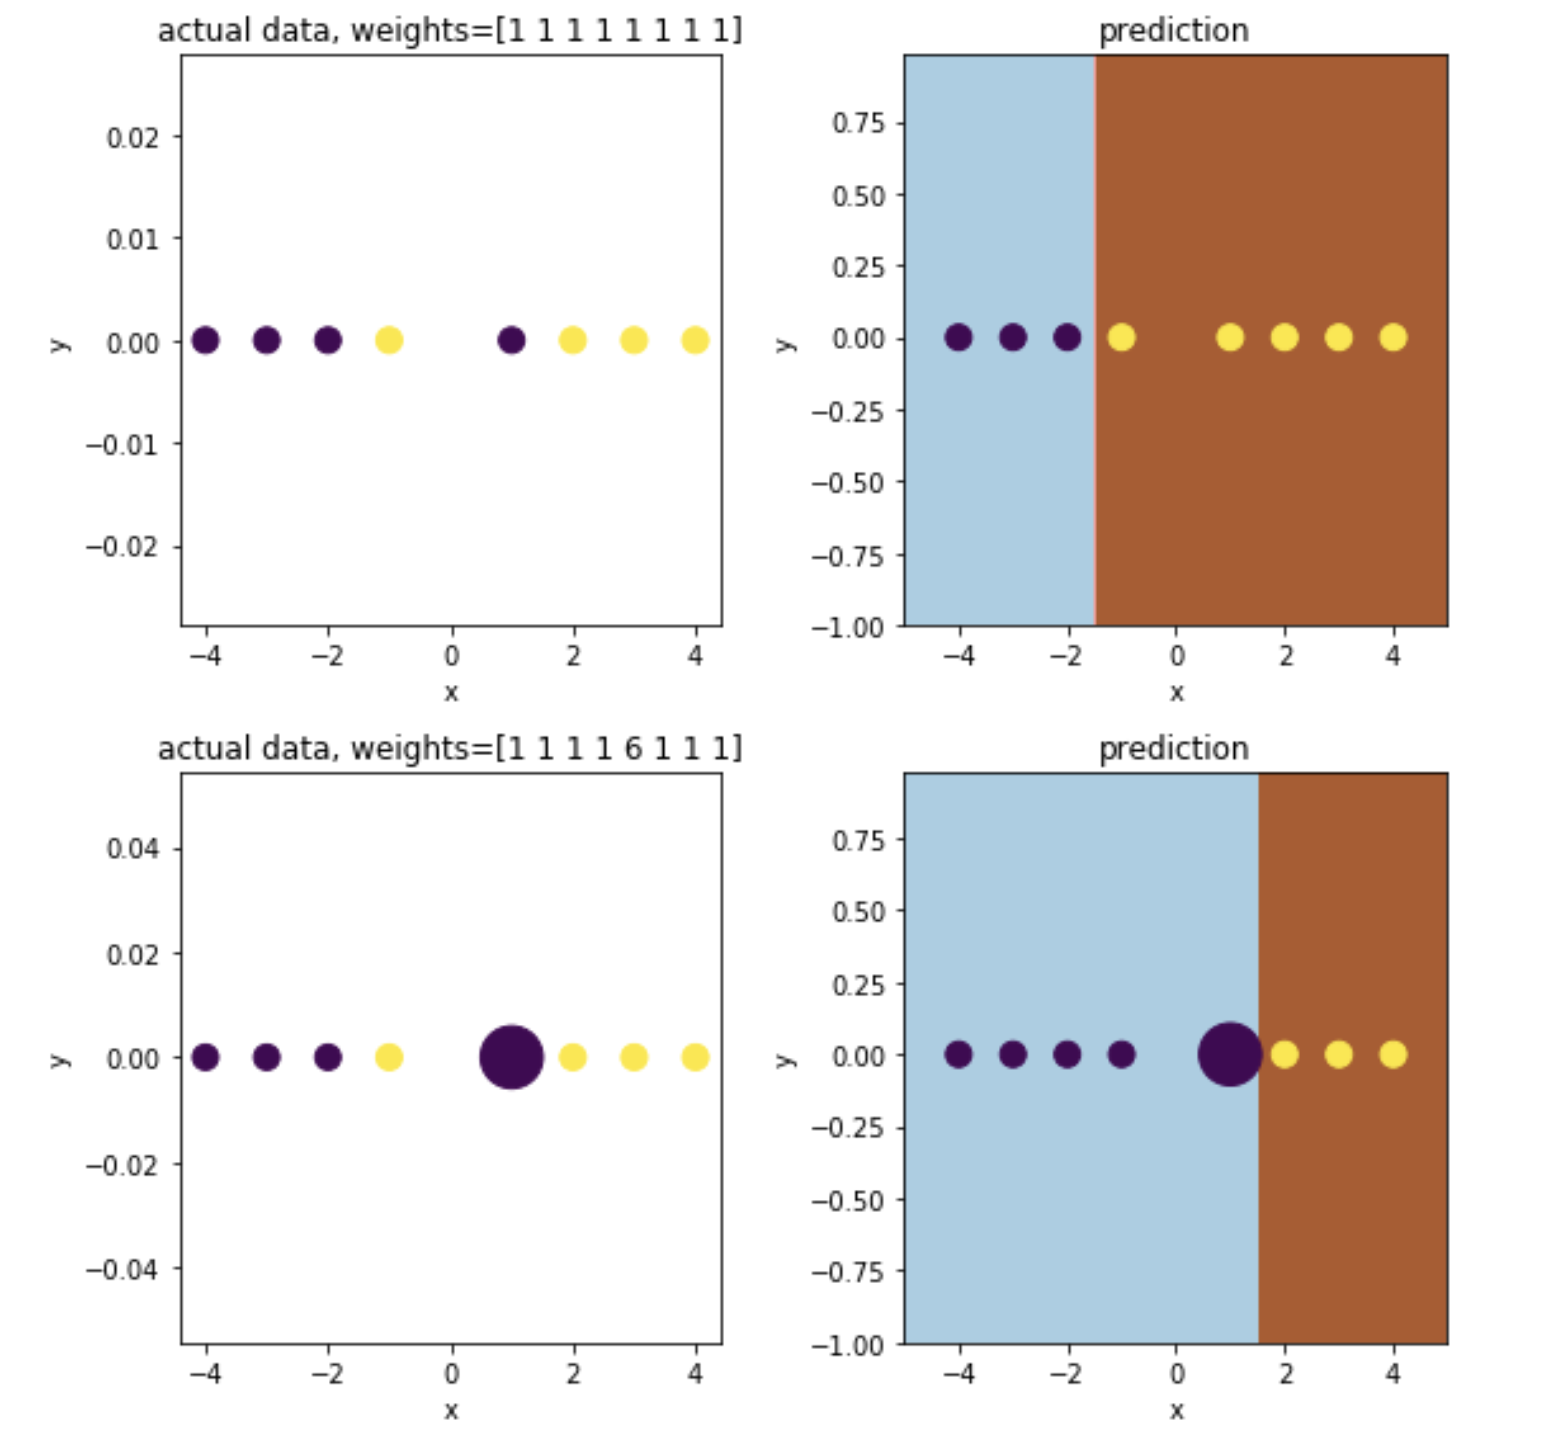

Gradient boosting approaches the problem a bit differently. Instead of adjusting weights of data points, Gradient boosting focuses on the difference between the prediction and the ground truth.
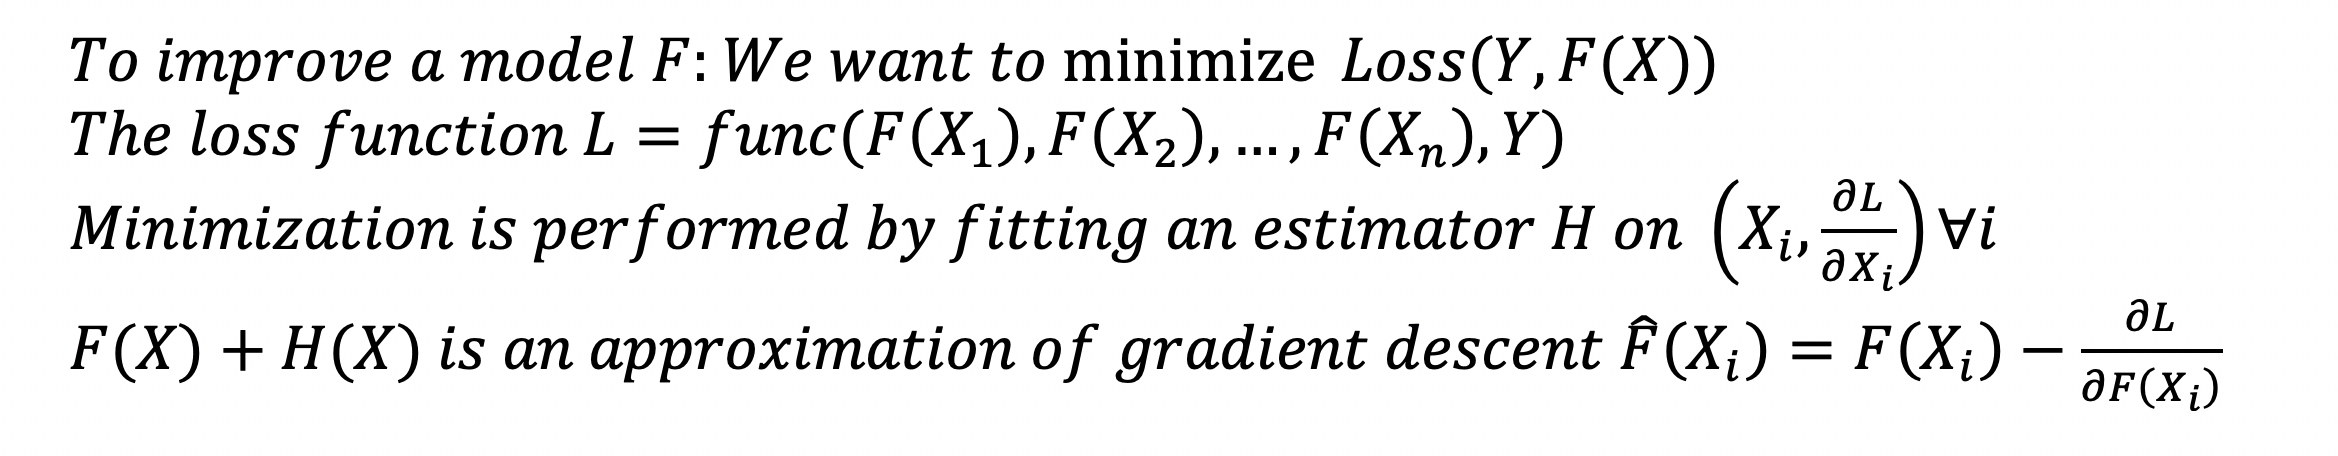

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
x=iris.data

In [ ]:
y=iris.target

In [ ]:
type(x)

In [ ]:
x=pd.DataFrame(x)

In [ ]:
type(x)

In [ ]:
x.shape

In [ ]:
x.info()

In [ ]:
x.head()

In [ ]:
x.describe()

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.7, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

In [ ]:
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
rf=GradientBoostingClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

In [ ]:
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import tree
model = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
from xgboost import XGBClassifier
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
accuracies.std()


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

In [ ]:
y_pred = clf_gini.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

In [ ]:
y_pred = clf_entropy.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

In [ ]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)
#a=X_train2.columns[imp_features]
#b=list(a)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)

### Observations:

### Conclusion: